In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

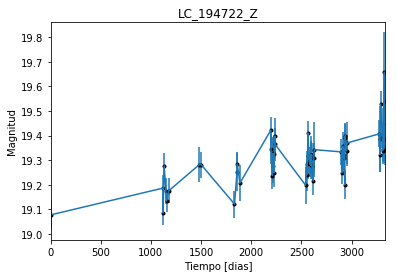

In [2]:
data = np.genfromtxt('LC_194722_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_194722_Z')
plt.savefig("LC_194722_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

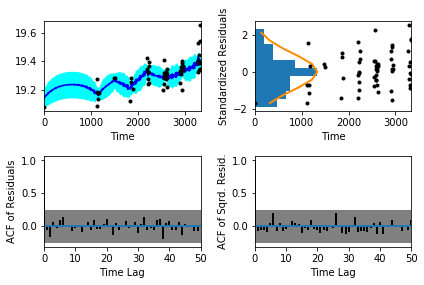

In [5]:
sample.assess_fit()

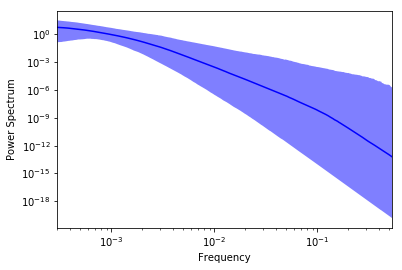

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

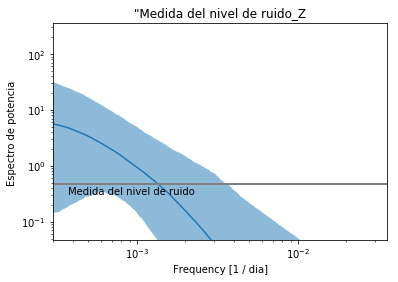

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_194722_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_194722_Z')

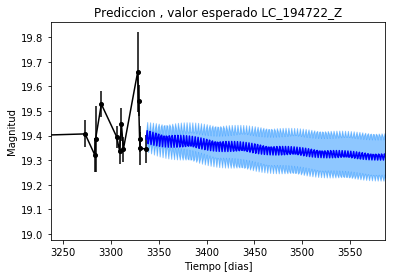

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_194722_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_194722_Z')

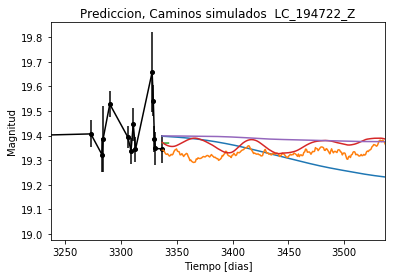

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_194722_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


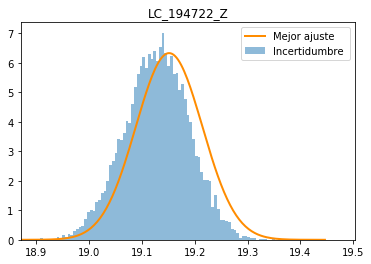

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_194722_Z')
plt.savefig("Mejor_ajuste_LC_194722_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_194722_Z')

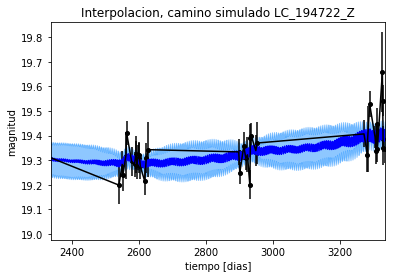

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_194722_Z')

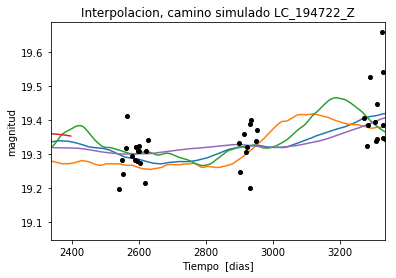

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 393.864581286
Median: 0.00566476838337
Standard deviation: 0.173334295924
68% credibility interval: [ 0.00061365  0.11145444]
95% credibility interval: [  3.35653589e-04   6.86694163e-01]
99% credibility interval: [  3.05445828e-04   9.50649391e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 511.986427231
Median: 0.000891664962486
Standard deviation: 0.05385316522
68% credibility interval: [ 0.00038736  0.01013348]
95% credibility interval: [ 0.00031284  0.12736946]
99% credibility interval: [  3.01517948e-04   3.88061568e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 348.333644162
Median: 0.032792044369
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 789.258902173
Median: 102.902357315
Standard deviation: 1.66269744723
68% credibility interval: [ 101.0209428   104.14444018]
95% credibility interval: [  98.5212845  104.8219766]
99% credibility interval: [  96.57842727  105.02923221]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 393.78653253
Median: 0.607103767705
Standard deviation: 2.1417228088
68% credibility interval: [ 0.05361906  3.7668054 ]
95% credibility interval: [ 0.01250127  7.06062665]
99% credibility interval: [  9.36391896e-03   1.02619801e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 775.684624675
Median: 0.183715181535
Standard deviation: 7.13265059565
68% credibility interval: [ 0.00628137  4.30340427]
95% credibility interval: [  4.660

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10418.050703
Median: 1.95781481293e-39
Standard deviation: 2.75424193488e+144
68% credibility interval: [  1.10598253e-163   1.40377276e-006]
95% credibility interval: [  4.26470201e-211   8.27951236e+068]
99% credibility interval: [  8.93561463e-225   5.48132921e+106]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1802.52226474
Median: 19.2597868919
Standard deviation: 0.0627486995803
68% credibility interval: [ 19.20214266  19.3053349 ]
95% credibility interval: [ 19.11597234  19.36973875]
99% credibility interval: [ 19.06141985  19.44787954]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 341.271161517
Median: 0.000491130845316
Standard deviation: 0.198369885415
68% credibility interval: [ 0.          0.18174969]
95% credibility interval: [ 0.          0.77080881]
99% credibility interval: [ 0.         0.9903619]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 341.271161517
Median: 0.000491130845316
Standard deviation: 0.198369885415
68% credibility interval: [ 0.          0.18174969]
95% credibility interval: [ 0.          0.77080881]
99% credibility interval: [ 0.         0.9903619]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1662.20004458
Median: 0.0
Standard deviation: 0.000436307840975
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 789.258902173
Median: 102.902357315
Standard deviation: 1.66269744723
68% credibility interval: [ 101.0209428   104.14444018]
95% credibility interval: [  98.5212845  104.8219766]
99% credibility interval: [  96.57842727  105.02923221]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1715.86267207
Median: 0.0105132729265
Standard deviation: 0.0142615838502
68% credibility interval: [ 0.00553153  0.02173204]
95% credibility interval: [ 0.00294227  0.04843566]
99% credibility interval: [ 0.00213005  0.08400984]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1408.96064295
Median: 1.09574089057
Standard deviation: 0.163255948944
68% credibility interval: [ 0.95005901  1.27501142]
95% credibility interval: [ 0.82569551  1.46687504]
99% credibility interval: [ 0.76713765  1.61053302]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1204.20654307
Median: 1.24529549385e-05
Standard deviation: 0.0874016854933
68% credibility interval: [  6.00197372e-08   8.64534188e-04]
95% credibility interval: [  6.36295141e-72   6.44625467e-02]
99% credibility interval: [  1.80312389e-111   4.91747633e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 393.864581286
Median: (-0.035592789475-0.181304870889j)
Standard deviation: 1.65517979983
68% credibility interval: [-0.70028890+0.j         -0.00385566-0.00104825j]
95% credibility interval: [ -4.31462668e+00-3.7653082j   -2.10897370e-03-0.74193924j]
99% credibility interval: [ -5.97310628e+00+0.j          -1.91917274e-03-6.52214529j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 511.986427231
Median: (-0.00560249619122+3.17353665628j)
Standard deviation: 1.2915083172
68% credibility interval: [-0.06367054+0.03548765j -0.00243386+1.13276321j]
95% credibility interval: [-0.80028590+1.01033647j -0.00196563+0.j        ]
99% credibility interval: [ -2.43826274e+00+5.28085962j  -1.89449314e-03+0.j        ]
Posterior summ